In [1]:
# a. import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# create list of unique tickers for Dow Jones, S&P 500, NASDAQ and Nikkei
tickers = ['^DJI', '^GSPC', '^IXIC', '^N225']
min_date = '2018-01-12'
max_date = '2023-01-14'

# download stock data
stock_df = yf.download(tickers, start=min_date, end=max_date, progress=True)
dow = yf.download('^DJI', progress=True)

# create dataframes for close prices
stock_df_close = stock_df['Adj Close']
dow_close = dow['Adj Close']

# convert index to datetime
stock_df_close.index = pd.to_datetime(stock_df_close.index)
dow_close.index = pd.to_datetime(dow_close.index)

# rename columns to match ticker names
stock_df_close.columns = ['Dow Jones', 'S&P 500', 'NASDAQ', 'Nikkei']

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed


# Problem 1

## a)

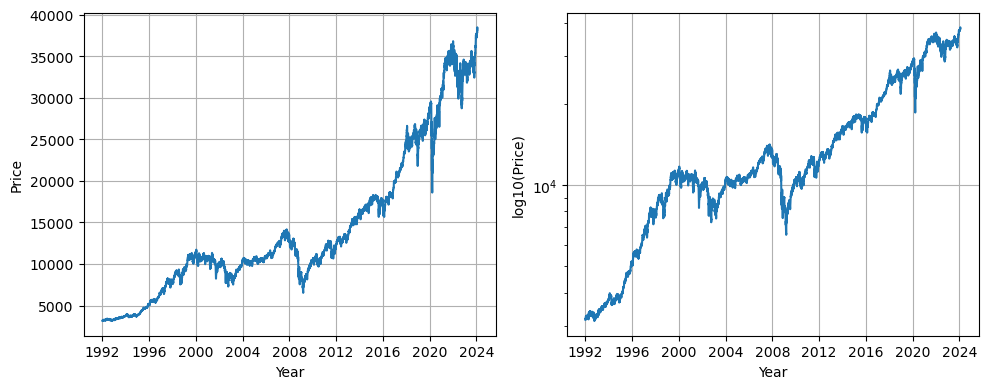

In [46]:
plt.figure(figsize=(10, 4))  # Adjust the figure size to accommodate the horizontal layout

# First subplot
plt.subplot(1, 2, 1)  # Change to 1 row, 2 columns, first plot
plt.plot(dow_close)
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

# Second subplot
plt.subplot(1, 2, 2)  # Change to 1 row, 2 columns, second plot
plt.plot(dow_close)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('log10(Price)')
plt.grid()

#plt.suptitle('Dow Jones Industrial Av')  # Set the title for the entire figure
plt.tight_layout()  # Add this to ensure the subplots do not overlap
plt.savefig('dow.png')

In [47]:
display(dow_close)

Date
1992-01-02     3172.399902
1992-01-03     3201.500000
1992-01-06     3200.100098
1992-01-07     3204.800049
1992-01-08     3203.899902
                  ...     
2024-01-25    38049.128906
2024-01-26    38109.429688
2024-01-29    38333.449219
2024-01-30    38467.308594
2024-01-31    38150.300781
Name: Adj Close, Length: 8080, dtype: float64

## b)

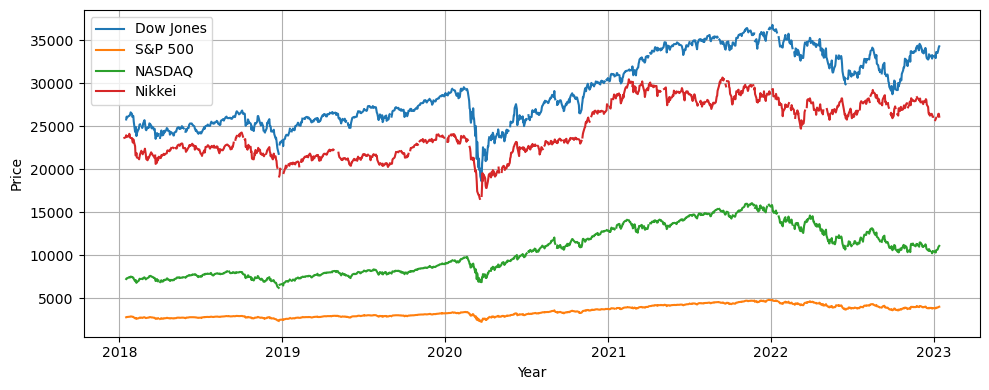

In [48]:
# plot the data
plt.figure(figsize=(10, 4))
plt.plot(stock_df_close)
#plt.title('Price of Indices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(stock_df_close.columns)
plt.grid()

plt.tight_layout()  # Add this to ensure the subplots do not overlap
plt.savefig('stocks.png')
plt.show()


In [49]:
# normalize the data to start at 100
stock_df_normalized = stock_df_close / stock_df_close.iloc[0] * 100

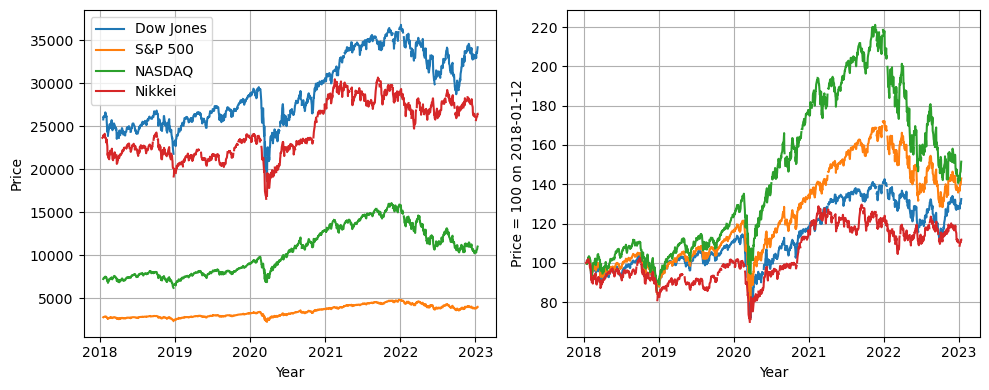

In [43]:
plt.figure(figsize=(10, 4))  # Adjust the figure size to accommodate the horizontal layout

# First subplot
plt.subplot(1, 2, 1)  # Change to 1 row, 2 columns, first plot
plt.plot(stock_df_close)
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(stock_df_normalized.columns)
plt.grid()

# Second subplot
plt.subplot(1, 2, 2)  # Change to 1 row, 2 columns, second plot
plt.plot(stock_df_normalized)
plt.xlabel('Year')
plt.ylabel('Price = 100 on 2018-01-12')
plt.grid()

#plt.suptitle('Dow Jones Industrial Av')  # Set the title for the entire figure
plt.tight_layout()  # Add this to ensure the subplots do not overlap
plt.savefig('stocks_compared.png')

In [50]:

dates = ['2018-01-12', '2019-01-11', '2020-01-10', '2020-01-13', '2021-01-13', '2022-01-13', '2023-01-13']
selected_data = stock_df_close.loc[dates]

# Calculate the yearly returns
# selected_data = selected_data.pct_change()

# fill na with previous value
selected_data

selected_data

,Dow Jones,S&P 500,NASDAQ,Nikkei
Date,,,,
2018-01-12,25803.189453,2786.239990,7261.060059,23653.820312
2019-01-11,23995.949219,2596.260010,6971.479980,20359.699219
2020-01-10,28823.769531,3265.350098,9178.860352,23850.570312
2020-01-13,28907.050781,3288.129883,9273.929688,NaN
2021-01-13,31060.470703,3809.840088,13128.950195,28456.589844
2022-01-13,36113.621094,4659.029785,14806.809570,28489.130859
2023-01-13,34302.609375,3999.090088,11079.160156,26119.519531
